In [ ]:
!pip install keras

In [ ]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [ ]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1['DIAGN'] = data1['DIAGN'].replace({2: 1})
data1['DIAGN'] = data1['DIAGN'].replace({3: 1})
data1['DIAGN'] = data1['DIAGN'].replace({4: 1})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    303
1    168
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_Anon/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_Anon/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_Anon/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_Anon/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_Anon/Case 003/,0
...,...,...,...,...,...
567,Case 248,2,20230418104244.jpg,PruebasCITOBOT_Anon/Case 248/,0
568,Case 249,2,20230418103711.jpg,PruebasCITOBOT_Anon/Case 249/,1
569,Case 249,2,20230418103638.jpg,PruebasCITOBOT_Anon/Case 249/,1
570,Case 250,2,20230418093117.jpg,PruebasCITOBOT_Anon/Case 250/,0


In [ ]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({2: 1})
data2['DIAGN'] = data2['DIAGN'].replace({3: 1})
print(data2['DIAGN'].value_counts())
data2

1    597
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,1
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,1


In [ ]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
dataC1 = data3[data3['DIAGN'] == 0]
dataC2 = data3[data3['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=531)
data_aleatoria2 = dataC2.sample(n=58)
data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1     58
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
46837,P357250,5,I494796_C1.jpg,training_SEG/NHS/,0
62582,P643577,9,I382324_C1.jpg,training_SEG/NHS/,0
45383,P328467,4,I705439_C1.jpg,training_SEG/NHS/,0
45382,P328467,4,I877108_C2.jpg,training_SEG/NHS/,0
39635,P222961,6,I147114_C2.jpg,training_SEG/NHS/,0
...,...,...,...,...,...
131,P333034,3,I112639.jpg,training_SEG/Biopsy_Study/,1
399,P803047,4,I216492.jpg,training_SEG/Biopsy_Study/,1
231,P514732,2,I496286.jpg,training_SEG/Biopsy_Study/,1
229,P508473,5,I121027.jpg,training_SEG/Biopsy_Study/,1


In [ ]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC1 = data4[data4['DIAGN'] == 0]
dataC2 = data4[data4['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=244)
data_aleatoria2 = dataC2.sample(n=244)
data4 = pd.concat([data_aleatoria, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

0    244
1    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
38,0,0,1220.jpg,Kaggle_SEG/Type_1/,0
125,0,0,379.jpg,Kaggle_SEG/Type_1/,0
129,0,0,401.jpg,Kaggle_SEG/Type_1/,0
89,0,0,180.jpg,Kaggle_SEG/Type_1/,0
157,0,0,536.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
813,0,0,618.jpg,Kaggle_SEG/Type_2/,1
1184,0,0,170.jpg,Kaggle_SEG/Type_3/,1
952,0,0,882.jpg,Kaggle_SEG/Type_2/,1
1011,0,0,988.jpg,Kaggle_SEG/Type_2/,1


In [ ]:
data = pd.concat([data2, data3])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
131,P333034,3,I112639.jpg,training_SEG/Biopsy_Study/,1
399,P803047,4,I216492.jpg,training_SEG/Biopsy_Study/,1
231,P514732,2,I496286.jpg,training_SEG/Biopsy_Study/,1
229,P508473,5,I121027.jpg,training_SEG/Biopsy_Study/,1


In [ ]:
#Distribuir clases (2)
print(data['DIAGN'].value_counts())

0    655
1    655
Name: DIAGN, dtype: int64


In [ ]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [ ]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  return img

In [ ]:
#Data Augmentation

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)

In [ ]:
#Arquitectura AlexNet
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Conv2D, MaxPooling2D,Flatten,BatchNormalization

def modelCompile():
  model = Sequential()
  model.add(Conv2D(96, (11, 11), strides=(4, 4), input_shape=(224,224,1), padding='valid', activation='relu',
                    kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  return model

model = modelCompile()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

Iteracion:  1
Epoch 1/150
27/27 [==============================] - 19s 196ms/step - loss: 0.6376 - accuracy: 0.6563 - val_loss: 0.5068 - val_accuracy: 0.7762
Epoch 2/150
27/27 [==============================] - 4s 146ms/step - loss: 0.5003 - accuracy: 0.7816 - val_loss: 0.5193 - val_accuracy: 0.7381
Epoch 3/150
27/27 [==============================] - 4s 150ms/step - loss: 0.4780 - accuracy: 0.7816 - val_loss: 0.4543 - val_accuracy: 0.7810
Epoch 4/150
27/27 [==============================] - 4s 154ms/step - loss: 0.4234 - accuracy: 0.8103 - val_loss: 0.4285 - val_accuracy: 0.8286
Epoch 5/150
27/27 [==============================] - 4s 144ms/step - loss: 0.4273 - accuracy: 0.8091 - val_loss: 0.4296 - val_accuracy: 0.8238
Epoch 6/150
27/27 [==============================] - 4s 149ms/step - loss: 0.4119 - accuracy: 0.8126 - val_loss: 0.4482 - val_accuracy: 0.8095
Epoch 7/150
27/27 [==============================] - 4s 144ms/step - loss: 0.4130 - accuracy: 0.8150 - val_loss: 0.4623 - val_a

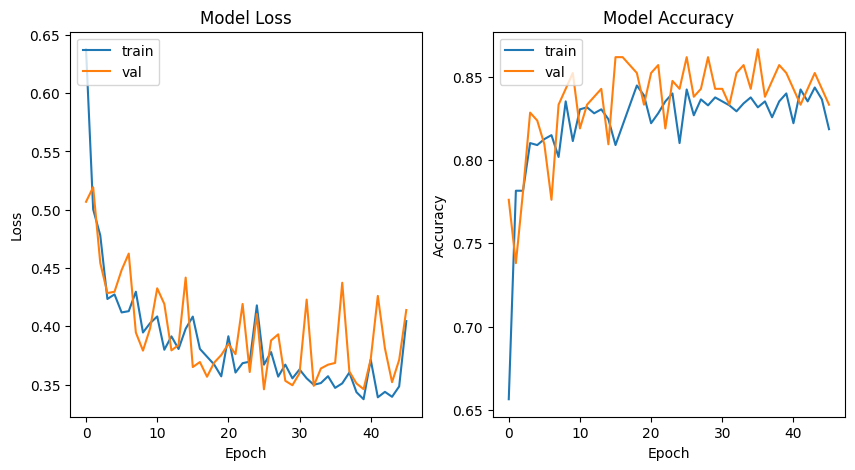

9/9 [==============================] - 5s 500ms/step
[[ 97  30]
 [  6 129]]
Specificity:  0.7637795275590551
Sensitivity:  0.9555555555555556
Accuracy:  0.8625954198473282
Precision:  [0.94174757 0.81132075]
Recall:     [0.76377953 0.95555556]
F1score:    [0.84347826 0.87755102]
Iteracion:  2
Epoch 1/150
27/27 [==============================] - 7s 162ms/step - loss: 0.6888 - accuracy: 0.6110 - val_loss: 0.5310 - val_accuracy: 0.7952
Epoch 2/150
27/27 [==============================] - 4s 147ms/step - loss: 0.5439 - accuracy: 0.7446 - val_loss: 0.5741 - val_accuracy: 0.7286
Epoch 3/150
27/27 [==============================] - 4s 152ms/step - loss: 0.4707 - accuracy: 0.7936 - val_loss: 0.4657 - val_accuracy: 0.7905
Epoch 4/150
27/27 [==============================] - 4s 153ms/step - loss: 0.4511 - accuracy: 0.8091 - val_loss: 0.4254 - val_accuracy: 0.8286
Epoch 5/150
27/27 [==============================] - 4s 148ms/step - loss: 0.4170 - accuracy: 0.8138 - val_loss: 0.4318 - val_accuracy

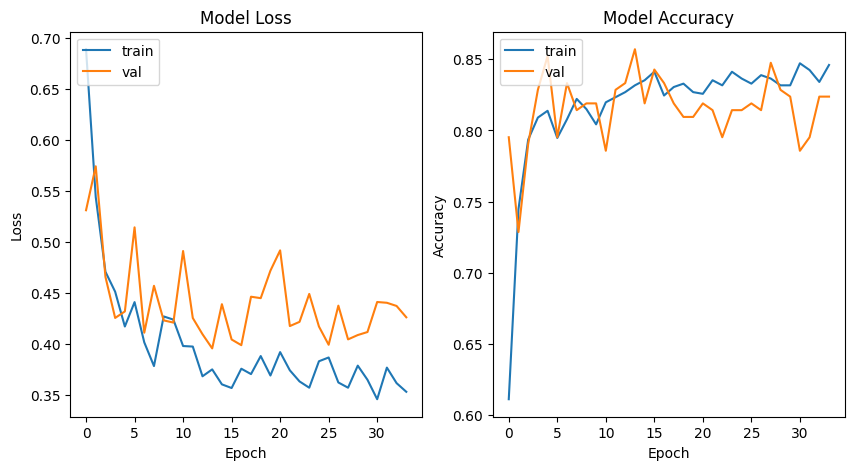

9/9 [==============================] - 5s 526ms/step
[[ 82  34]
 [  3 143]]
Specificity:  0.7068965517241379
Sensitivity:  0.9794520547945206
Accuracy:  0.8587786259541985
Precision:  [0.96470588 0.8079096 ]
Recall:     [0.70689655 0.97945205]
F1score:    [0.8159204  0.88544892]
Iteracion:  3
Epoch 1/150
27/27 [==============================] - 7s 168ms/step - loss: 0.6606 - accuracy: 0.6492 - val_loss: 0.5787 - val_accuracy: 0.7095
Epoch 2/150
27/27 [==============================] - 4s 152ms/step - loss: 0.5523 - accuracy: 0.7267 - val_loss: 0.5417 - val_accuracy: 0.7762
Epoch 3/150
27/27 [==============================] - 4s 152ms/step - loss: 0.5195 - accuracy: 0.7673 - val_loss: 0.4914 - val_accuracy: 0.7714
Epoch 4/150
27/27 [==============================] - 4s 155ms/step - loss: 0.4782 - accuracy: 0.7959 - val_loss: 0.4496 - val_accuracy: 0.8190
Epoch 5/150
27/27 [==============================] - 4s 156ms/step - loss: 0.4474 - accuracy: 0.8067 - val_loss: 0.4211 - val_accuracy

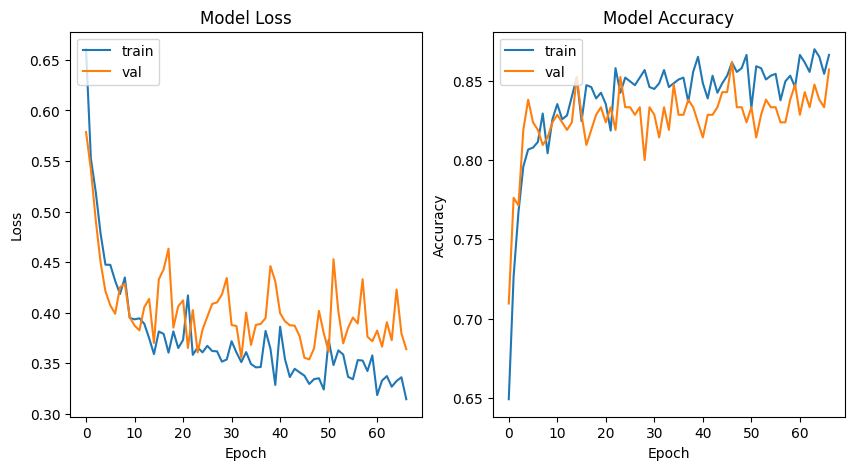

9/9 [==============================] - 4s 367ms/step
[[ 97  35]
 [  9 121]]
Specificity:  0.7348484848484849
Sensitivity:  0.9307692307692308
Accuracy:  0.8320610687022901
Precision:  [0.91509434 0.77564103]
Recall:     [0.73484848 0.93076923]
F1score:    [0.81512605 0.84615385]
Iteracion:  4
Epoch 1/150
27/27 [==============================] - 7s 167ms/step - loss: 0.6371 - accuracy: 0.6432 - val_loss: 0.6019 - val_accuracy: 0.7095
Epoch 2/150
27/27 [==============================] - 4s 153ms/step - loss: 0.5619 - accuracy: 0.7279 - val_loss: 0.5180 - val_accuracy: 0.7333
Epoch 3/150
27/27 [==============================] - 4s 151ms/step - loss: 0.4844 - accuracy: 0.7828 - val_loss: 0.4625 - val_accuracy: 0.8143
Epoch 4/150
27/27 [==============================] - 4s 149ms/step - loss: 0.4491 - accuracy: 0.8043 - val_loss: 0.4028 - val_accuracy: 0.8429
Epoch 5/150
27/27 [==============================] - 4s 144ms/step - loss: 0.4377 - accuracy: 0.8079 - val_loss: 0.4192 - val_accuracy

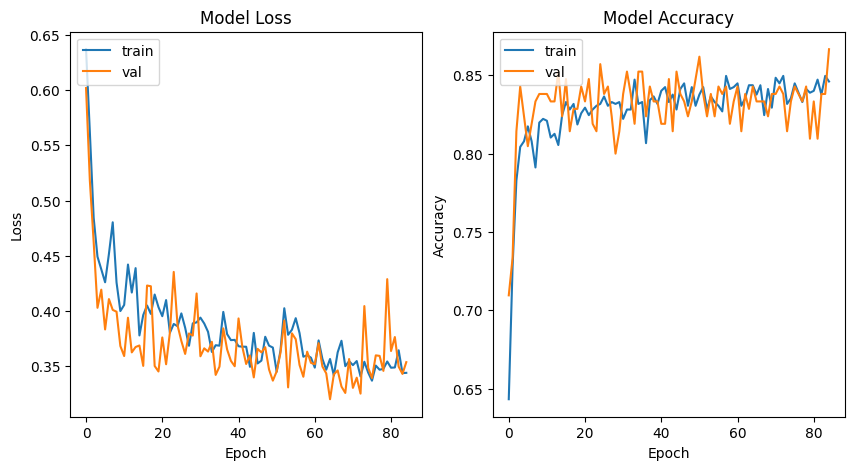

9/9 [==============================] - 4s 403ms/step
[[114  26]
 [  5 117]]
Specificity:  0.8142857142857143
Sensitivity:  0.9590163934426229
Accuracy:  0.8816793893129771
Precision:  [0.95798319 0.81818182]
Recall:     [0.81428571 0.95901639]
F1score:    [0.88030888 0.88301887]
Iteracion:  5
Epoch 1/150
27/27 [==============================] - 7s 164ms/step - loss: 0.6067 - accuracy: 0.6933 - val_loss: 0.5349 - val_accuracy: 0.7667
Epoch 2/150
27/27 [==============================] - 4s 143ms/step - loss: 0.5334 - accuracy: 0.7649 - val_loss: 0.5801 - val_accuracy: 0.7048
Epoch 3/150
27/27 [==============================] - 4s 151ms/step - loss: 0.4797 - accuracy: 0.7876 - val_loss: 0.4950 - val_accuracy: 0.7667
Epoch 4/150
27/27 [==============================] - 4s 156ms/step - loss: 0.4746 - accuracy: 0.8007 - val_loss: 0.4488 - val_accuracy: 0.7952
Epoch 5/150
27/27 [==============================] - 4s 143ms/step - loss: 0.4708 - accuracy: 0.7924 - val_loss: 0.7179 - val_accuracy

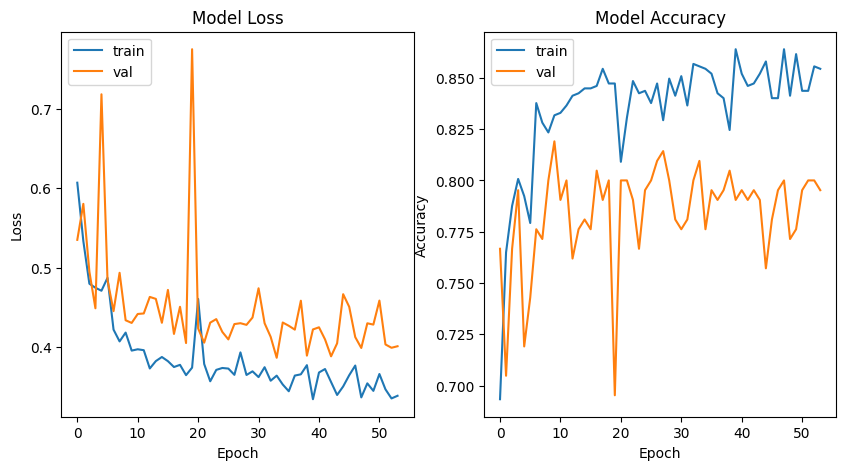

9/9 [==============================] - 5s 556ms/step
[[100  29]
 [  9 124]]
Specificity:  0.7751937984496124
Sensitivity:  0.9323308270676691
Accuracy:  0.8549618320610687
Precision:  [0.91743119 0.81045752]
Recall:     [0.7751938  0.93233083]
F1score:    [0.84033613 0.86713287]
Media
Specificity:  0.7590008153734009  |  Sensitivity:  0.9514248123259199
Accuracy:  0.8580152671755725  |  Precision:  0.8720472900128445  |  Recall:  0.8552128138496604  |  F1score:  0.8554475242090419

Desviacion
Specificity:  0.03644079636621901  |  Sensitivity:  0.018173908695499324
Accuracy:  0.015902798974045517  |  Precision:  0.0696647562279463  |  Recall:  0.10042838219016596  |  F1score:  0.02559231546748511


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  #Conjutnos de Train, Validation y Test
  x_trainPath, x_testPath, y_trainPath, y_testPath = train_test_split(data, data['DIAGN'], test_size=0.2)
  x_trainPath, x_valPath, y_trainPath, y_valPath = train_test_split(x_trainPath, y_trainPath, test_size=0.2)

  y_trainPath = np.array(y_trainPath)
  y_testPath = np.array(y_testPath)
  y_valPath = np.array(y_valPath)

  #Cargar los path de las imagenes para el pipeline
  dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
  path_train = dataPathDrive + x_trainPath["PATH"] + x_trainPath['IMAGE_ID']
  path_test = dataPathDrive + x_testPath["PATH"] + x_testPath['IMAGE_ID']
  path_val = dataPathDrive + x_valPath["PATH"] + x_valPath['IMAGE_ID']

  path_train = np.array(path_train)
  path_test = np.array(path_test)
  path_val = np.array(path_val)

  #Convertir en tensores
  data_train = tf.data.Dataset.from_tensor_slices(path_train)
  data_test = tf.data.Dataset.from_tensor_slices(path_test)
  data_val = tf.data.Dataset.from_tensor_slices(path_val)

  #Procesar y Cargar Imagenes
  data_train = data_train.map(process_image)
  data_test = data_test.map(process_image)
  data_val = data_val.map(process_image)

  train = tf.data.Dataset.from_tensor_slices(to_categorical(y_trainPath, 2))
  train = tf.data.Dataset.zip((data_train,train))

  test = tf.data.Dataset.from_tensor_slices(to_categorical(y_testPath, 2))
  test = tf.data.Dataset.zip((data_test,test))

  val = tf.data.Dataset.from_tensor_slices(to_categorical(y_valPath, 2))
  val = tf.data.Dataset.zip((data_val,val))

  AS = train.batch(batch_size=32)
  AST = test.batch(batch_size=32)
  ASV = val.batch(batch_size=32)

  #Aplicar aumento de datos
  x_train = np.array(list(data_train.as_numpy_iterator()))
  y_train = np.array(list(train.as_numpy_iterator()), dtype=object)
  y_train = np.array([y[1] for y in y_train])

  x_val = np.array(list(data_val.as_numpy_iterator()))
  y_val = np.array(list(val.as_numpy_iterator()), dtype=object)
  y_val = np.array([y[1] for y in y_val])

  data_gen_train = datagen.flow(x_train, y_train, batch_size=32)
  data_gen_val = datagen.flow(x_val, y_val, batch_size=32)

  #Cargar Modelo
  model = modelCompile()

  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=20,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(data_gen_train, epochs=150, verbose=1, validation_data= data_gen_val, callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  model.evaluate(AST)
  pred = model.predict(AST)

  y_testPath = list(y_testPath)
  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_testPath, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_testPath,pred_label))
  precVec.append(precision_score(y_testPath,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_testPath,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_testPath,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_testPath,pred_label))
  print("Precision: ",precision_score(y_testPath,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_testPath,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

In [ ]:
#import tensorflow as tf

#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()

#with open("model.tflite", 'wb') as f:
#  f.write(tflite_model)